In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/home/ludo/ownCloud/Programmes/quarto/biomaths_www':
  os.chdir(r'/home/ludo/ownCloud/Programmes/quarto/biomaths_www')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


/tmp/ipykernel_412054/3972549079.py:20: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/home/ludo/miniconda3/lib/python3.10/importlib/_bootstrap.py": 1669299894.0, "/home/ludo/miniconda3/lib/python3.10/importlib/_bootstrap_external.py": 1669299894.0, "/home/ludo/miniconda3/lib/python3.10/codecs.py": 1669299894.0, "/home/ludo/miniconda3/lib/python3.10/encodings/aliases.py": 1669299894.0, "/home/ludo/miniconda3/lib/python3.10/encodings/__init__.py": 1669299894.0, "/home/ludo/miniconda3/lib/python3.10/encodings/utf_8.py": 1669299894.0, "/home/ludo/miniconda3/lib/python3.10/abc.py": 1669299894.0, "/home/ludo/miniconda3/lib/python3.10/io.py": 1669299894.0, "/home/ludo/miniconda3/lib/python3.10/stat.py": 1669299894.0, "/home/ludo/miniconda3/lib/python3.10/_collections_abc.py": 1669299894.0, "/home/ludo/miniconda3/lib/python3.10/genericpath.py": 1669299894.0, "/home/ludo/miniconda3/lib/python3.10/posixpath.py": 1669299894.0, "/home/ludo/miniconda3/lib/python3.10/os.py": 1669299894.0, "/home/ludo/miniconda3/lib/python3.10/_sitebuiltins.py": 1669299894.0, "/home/ludo/miniconda3

In [2]:
#| code-fold: true
## on nettoie l'espace de travail et on reload les modules
%reset -f

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
 
## densités initiales des populations
x0 = 1
y0 = 2.5
etat0_LV = np.array([x0, y0])

## tspan
t_0 = 0             
t_fin = 30.0        
pas_t = 0.01        
tspan = np.arange(t_0, t_fin, pas_t)

## paramètres du modèle
r = 1.0
c = 1.0
b = 1.0
m = 1.0
params_LV = np.array([r, c, b, m])

## définition du modèle de Lotka Volterra
def model_LV(etat, t, params):
    x, y = etat                       # recupere les variables d'etat
    r, c, b, m = params               # recupere les parametres 
    etatdot = [r*x - c*x*y,           # dot x
               b*x*y - m*y]           # dot y
    return etatdot                    # renvoie la derivee

## simulation proprement dite
int_LV = odeint(model_LV, etat0_LV, tspan, args=(params_LV,), hmax=pas_t)

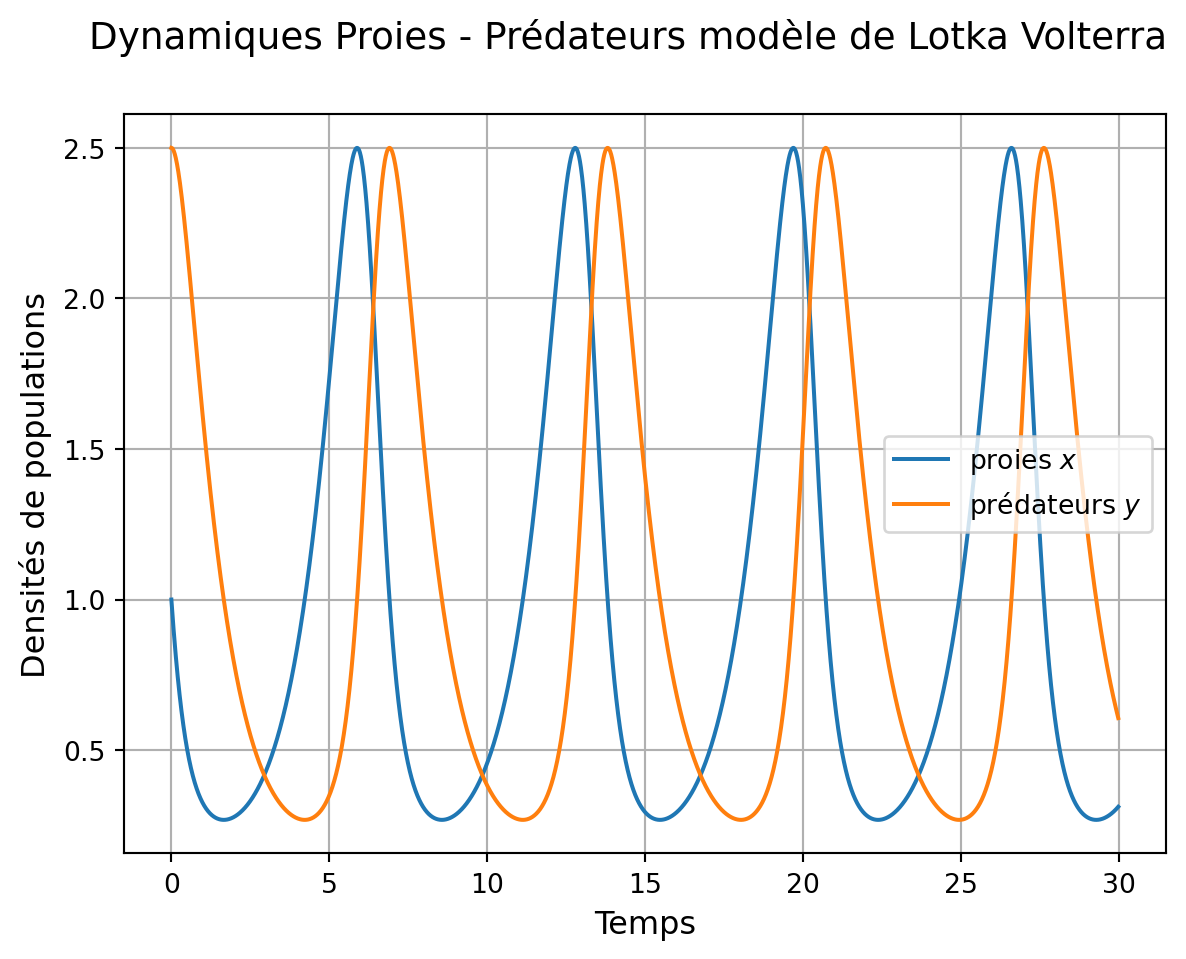

In [3]:
#| code-fold: true
#| label: fig-lovo-temps
#| fig-cap: dynamiques des proies et prédateurs contre le temps dans le modèle de Lotka et Volterra (@eq-lovo)

## création d'une figure, et d'un système d'axe
fig1, ax1 = plt.subplots(1, 1)  

fig1.suptitle("Dynamiques Proies - Prédateurs modèle de Lotka Volterra",
             va='top', fontsize='14')

## tracé de x et y contre le temps
ax1.plot(tspan, int_LV[:, 0], color = 'C0', label = "proies $x$")
ax1.plot(tspan, int_LV[:, 1], color = 'C1', label = "prédateurs $y$")

## axes & co
ax1.set_xlabel('Temps', fontsize='12')
ax1.set_ylabel('Densités de populations', fontsize='12')
ax1.legend()
ax1.grid()

In [4]:
#| code-fold: true
## array annexes pour le calcul et la représentation des isoclines nulles
xplot = np.arange(0, 3, .1)  
yplot = np.arange(0, 3, .1)

## isoclines nulles de xdot
null_x_x = np.zeros_like(yplot)        # x = 0 isocline nulle de xdot
null_x_y = np.ones_like(xplot)*(r/c)   # y = r/c isocline nulle de xdot

## isoclines nulles de ydot
null_y_y = np.zeros_like(xplot)        # y = 0 isocline nulle de ydot
null_y_x = np.ones_like(yplot)*(m/b)   # x = m/b isocline nulle de ydot

## équilibres
eq_extinct = [0, 0]
eq_coex = [r/c, m/b]

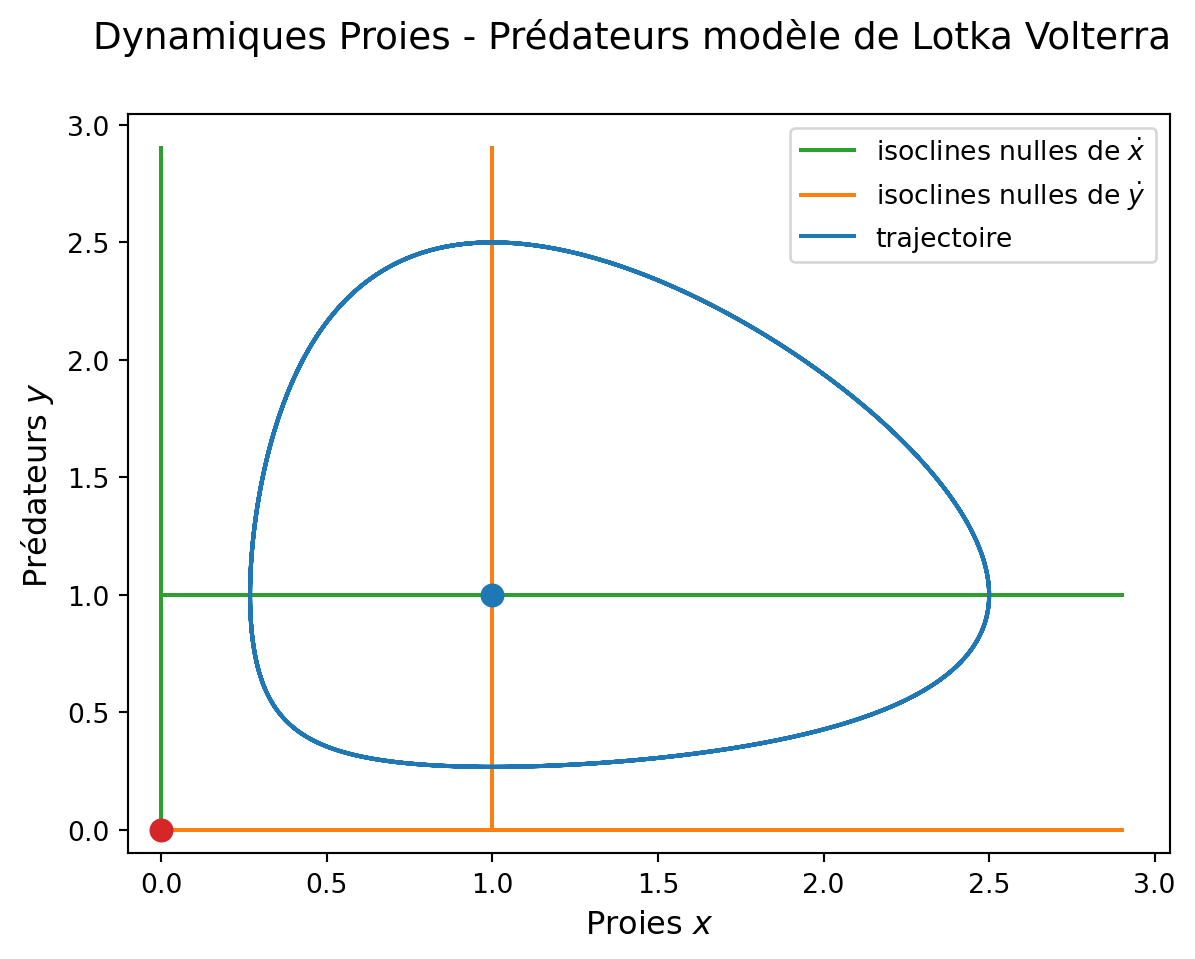

In [5]:
#| code-fold: true
#| label: fig-lovo-plane
#| fig-cap: plan de phase du modèle proies-prédateurs de Lotka Volterra (@eq-lovo)

## création d'une figure, et d'un système d'axe
fig2, ax2 = plt.subplots(1, 1)  

## titre de la figure
fig2.suptitle("Dynamiques Proies - Prédateurs modèle de Lotka Volterra", 
            va='top', fontsize='14')

## isoclines nulles 
ax2.plot(null_x_x, yplot, color = 'C2')
ax2.plot(xplot, null_x_y, color = 'C2', label = "isoclines nulles de $\dot x$")
ax2.plot(xplot, null_y_y, color = 'C1')
ax2.plot(null_y_x, yplot, color = 'C1', label = "isoclines nulles de $\dot y$")

## équilibres
ax2.plot(eq_extinct[0], eq_extinct[1], marker ='.', color = 'C3', markersize = 16)
ax2.plot(eq_coex[0], eq_coex[1], marker ='.', 
        color = 'C0', markersize = 16)
## trajectoires
ax2.plot(int_LV[:, 0], int_LV[:, 1], color = 'C0', label = "trajectoire")

## enluminures
ax2.set_xlabel('Proies $x$', fontsize='12')
ax2.set_ylabel('Prédateurs $y$', fontsize='12')
ax2.legend(fontsize='10', loc = "upper right")

## modification éventuelle des bornes des axes
ax2.set_ylim(bottom=-.1, top=None)
ax2.set_xlim(left=-.1, right=None);

In [6]:
## définition de l'échantillonnage selon $x$ et $y$
x_grid = np.linspace(0.1, 3.0, 10)   # au passage on change un peu de np.arange()
y_grid = np.linspace(0.1, 3.0, 10)

## grille X,Y selon x_grid et y_grid
X, Y = np.meshgrid(x_grid, y_grid)

In [7]:
dx, dy = model_LV([X, Y], 0, params_LV)

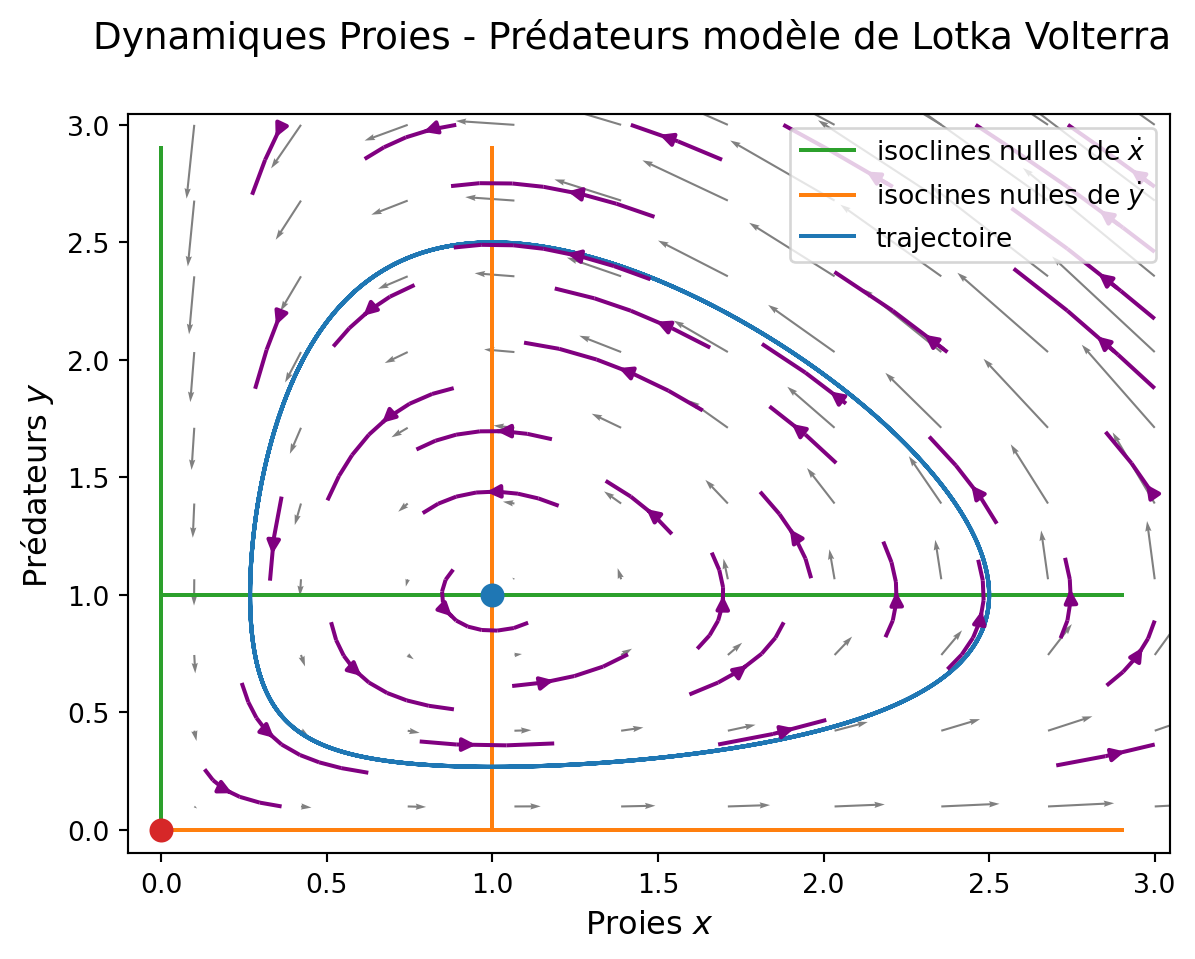

In [8]:
#| label: fig-lovo-plane-complet
#| fig-cap: plan de phase du modèle proies-prédateurs de Lotka Volterra

## tracé du champs de vecteur
ax2.quiver(X, Y, dx, dy, angles = 'xy', color = 'grey', width = .002)

## tracé des échantillons de trajectoires
ax2.streamplot(X, Y, dx, dy, density = 0.4, maxlength = 0.25, color = "purple")

display(fig2)

In [9]:
def int_premiere(etat, params):
    x, y = etat                       
    r, c, b, m = params               
    H_xy = -r*np.log(y) + c*y - m*np.log(x) + b*x  
    return H_xy

In [10]:
#| code-fold: true
x_grid = np.linspace(0.15, 3.0, 30)   
y_grid = np.linspace(0.15, 3.0, 30)
X, Y = np.meshgrid(x_grid, y_grid)

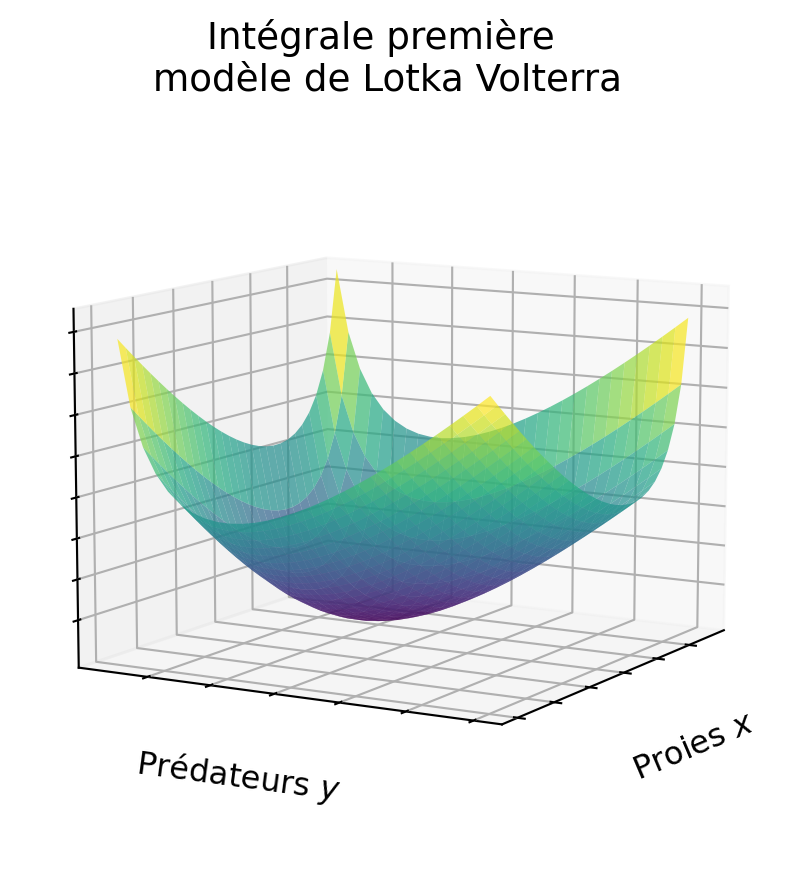

In [11]:
#| label: fig-int-prem
#| fig-cap: intégrale première du modèle proies prédateurs de Lotka Volterra (@eq-lovo)

fig3, ax3 = plt.subplots(1, 1, subplot_kw={"projection": "3d"})  

## colormaps
from matplotlib import cm

## intégrale première sur la grille X, Y
ax3.plot_surface(X, Y, int_premiere([X, Y], params_LV),
             cmap=cm.viridis, antialiased=True, alpha =.7)

## réglage de l'angle de vision en fonction de l'élévation et de l'azimut
ax3.view_init(elev=10, azim= 30)

## labellisation des axes
ax3.set_xlabel('Proies $x$', fontsize='12')
ax3.set_ylabel('Prédateurs $y$', fontsize='12')
ax3.set_zlabel('Intégrale première', fontsize='12')

ax3.set_yticklabels([])
ax3.set_xticklabels([])
ax3.set_zticklabels([])
fig3.suptitle("Intégrale première\n modèle de Lotka Volterra", 
            va='top', fontsize='14');

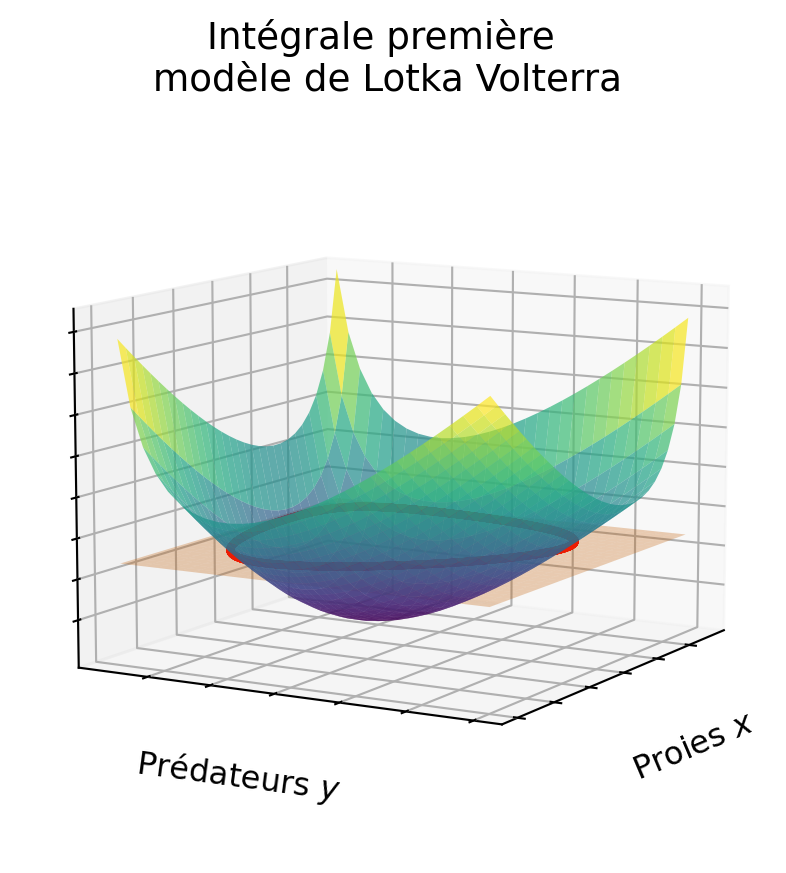

In [12]:
#| label: fig-int-prem-full
#| fig-cap: intégrale première du modèle proies prédateurs de Lotka Volterra (@eq-lovo)

## H(x,y) = H(x0,y0)
ax3.plot_surface(X, Y, 
                np.ones_like(X)*int_premiere([x0, y0], params_LV), 
                antialiased=True, alpha =.3)

## trajectoire
ax3.plot(int_LV[:,0], int_LV[:,1], 
         int_premiere([int_LV[:,0], int_LV[:,1]], params_LV), 
         color = "red", linewidth = 3)

display(fig3)

In [13]:
#| code-fold: true
%reset -f

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

## densités initiales des populations
x0 = 1
y0 = 2.5
etat0_RMA = np.array([x0, y0])

## tspan 
t_0 = 0             
t_fin = 80.0        
pas_t = 0.01         
tspan = np.arange(t_0, t_fin, pas_t)

## paramètres (il y a un cycle limite attractif pour ces valeurs)
r = 1.0
K = 10
c = 1.0
h = 2.0
b = 2.0
m = 1.0
params_RMA = np.array([r, K, c, h, b, m])

## modèle 
def model_RMA(etat, t, params):
    x, y = etat                               
    r, K, c, h, b, m = params               
    etatdot = [r*x*(1-x/K) - c*x/(h+x)*y,   
               b*x/(h+x)*y - m*y]       
    return etatdot                     

## simulation 
int_RMA = odeint(model_RMA, etat0_RMA, tspan, args=(params_RMA,), hmax=pas_t)

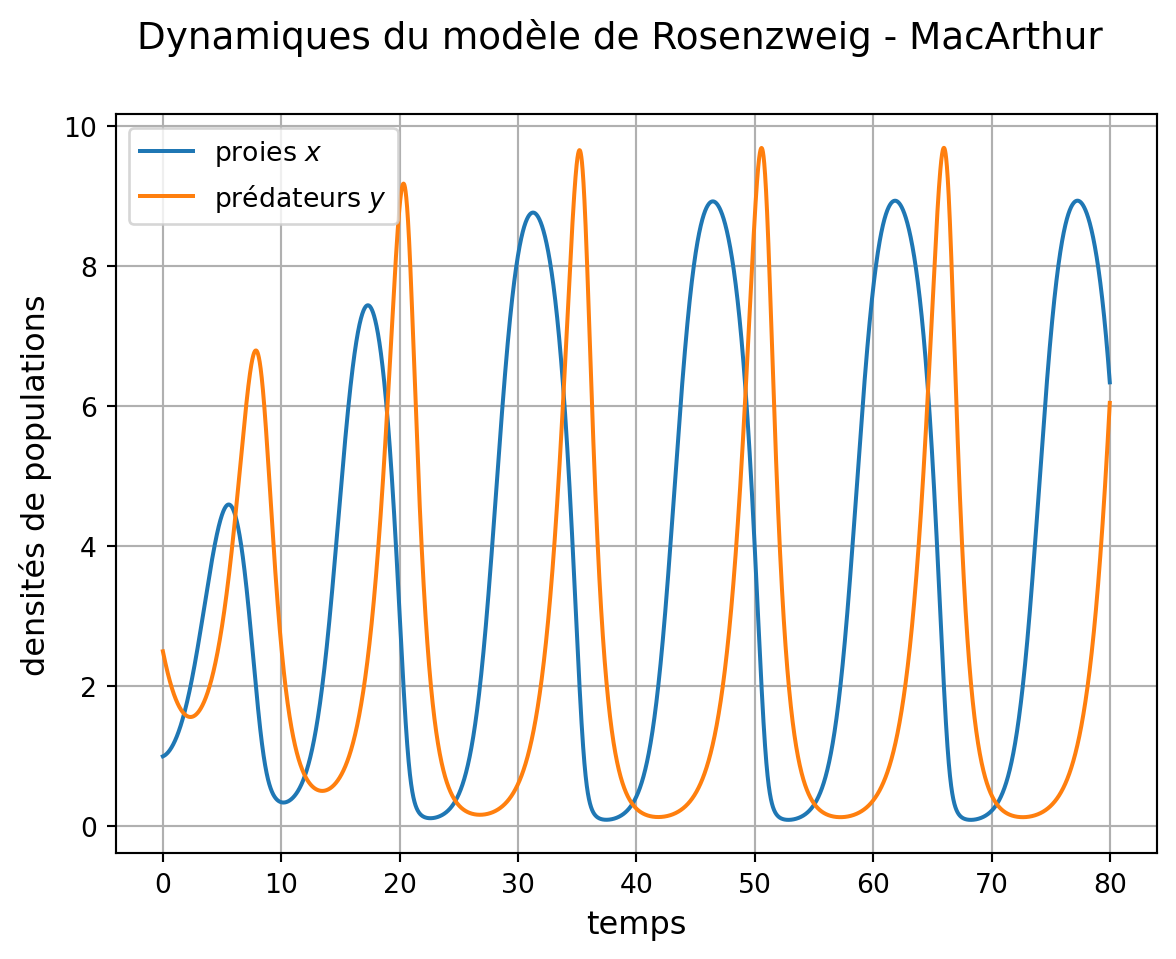

In [14]:
#| code-fold: true
#| label: fig-rma-temps
#| fig-cap: simulation des trajectoires du modèle de Rosenzweig et MacArthur (@eq-rma)

fig1, ax1 = plt.subplots(1, 1)  
fig1.suptitle("Dynamiques du modèle de Rosenzweig - MacArthur", 
            va='top', fontsize='14')

## tracé de x et y contre le temps
ax1.plot(tspan, int_RMA[:, 0], color = 'C0', label = "proies $x$")
ax1.plot(tspan, int_RMA[:, 1], color = 'C1', label = "prédateurs $y$")

## enluminures
ax1.set_xlabel('temps', fontsize='12')
ax1.set_ylabel('densités de populations', fontsize='12')
ax1.legend(fontsize='10')
ax1.grid()

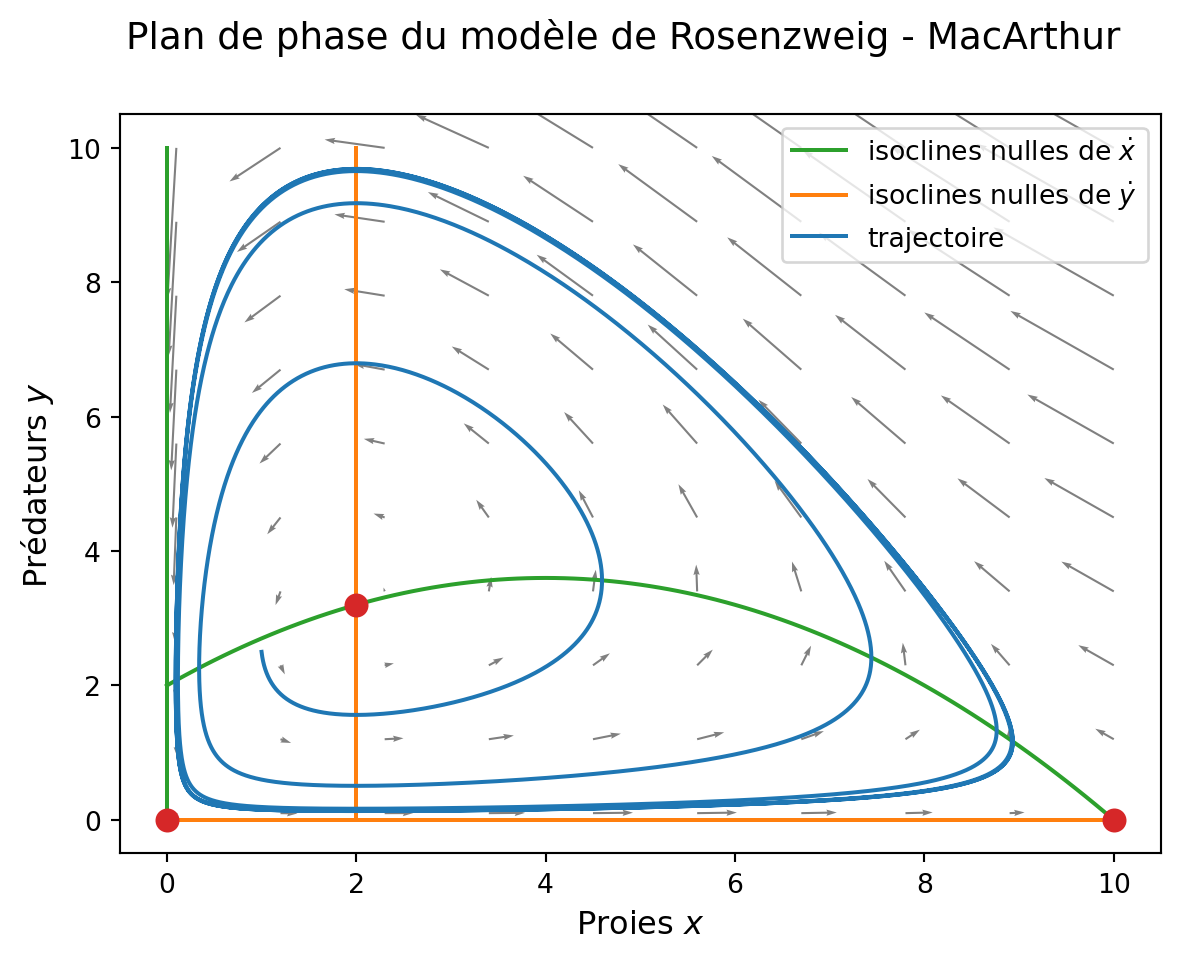

In [15]:
#| code-fold: true
#| label: fig-rma-plane
#| fig-cap: plan de phase du modèle de Rosenzweig et MacArthur (@eq-rma)

fig2, ax2 = plt.subplots(1, 1)  
fig2.suptitle("Plan de phase du modèle de Rosenzweig - MacArthur", 
                va='top', fontsize='14')

## calcul des isoclines nulles
xplot = np.arange(0, K+.1, .1)  
yplot = np.arange(0, K+.1, .1)

null_x_x = np.zeros_like(yplot)        
null_x_y = r/c*(h+xplot)*(1-xplot/K)   

null_y_y = np.zeros_like(xplot)        
null_y_x = np.ones_like(yplot)*m*h/(b-m)

## équilibres
eq_extinct = [0, 0]
eq_coex = [m*h/(b-m), r/c*(h+m*h/(b-m))*(1-m*h/(b-m)/K)]
eq_prey = [K, 0]

## tracé des isoclines nulles, des équilibres, et de la trajectoire simulée
ax2.plot(null_x_x, yplot, color = 'C2')
ax2.plot(xplot, null_x_y, color = 'C2', label = "isoclines nulles de $\dot x$")
ax2.plot(xplot, null_y_y, color = 'C1')
ax2.plot(null_y_x, yplot, color = 'C1', label = "isoclines nulles de $\dot y$")

## équilibres
ax2.plot(eq_extinct[0], eq_extinct[1], marker ='.', color = 'C3', markersize = 16)
ax2.plot(eq_coex[0], eq_coex[1], marker ='.', color = 'C3', markersize = 16)
ax2.plot(eq_prey[0], eq_prey[1], marker ='.', color = 'C3', markersize = 16)

## trajectoires
ax2.plot(int_RMA[:, 0], int_RMA[:, 1], color = 'C0', label = "trajectoire")

## enluminures
ax2.set_xlabel('Proies $x$', fontsize='12')
ax2.set_ylabel('Prédateurs $y$', fontsize='12')
ax2.legend(fontsize='10', loc = "upper right")
ax2.set_ylim(bottom=-.5, top=None)
ax2.set_xlim(left=-.5, right=None)

## représentation du champs de vecteurs
x_grid = np.linspace(0.1, K, 10)   
y_grid = np.linspace(0.1, K, 10)
X, Y = np.meshgrid(x_grid, y_grid)

## dérivées dot_x et dot_y sur la grille
dx, dy = model_RMA([X, Y], 0, params_RMA)

ax2.quiver(X, Y, dx, dy, angles = 'xy', color = 'grey', width = .002);

In [16]:
#| code-fold: true
pas_K = .1

## situation 1. 
Kplot1 = np.arange(pas_K, m*h/(b-m)+pas_K, pas_K) 
y_prey1 = np.zeros_like(Kplot1)                    

## situation 2.
Kplot2 = np.arange(m*h/(b-m), h+2*m*h/(b-m)+pas_K, pas_K)
y_prey2 = np.zeros_like(Kplot2)                    
y_coex2 = [r/c*(h+m*h/(b-m))*(1-m*h/(b-m)/K_p) for K_p in Kplot2]

## situation 3.
Kplot3 = np.arange(h+2*m*h/(b-m), 8, pas_K/2)      
y_prey3 = np.zeros_like(Kplot3)                    
y_coex3 = [r/c*(h+m*h/(b-m))*(1-m*h/(b-m)/K_p) for K_p in Kplot3]

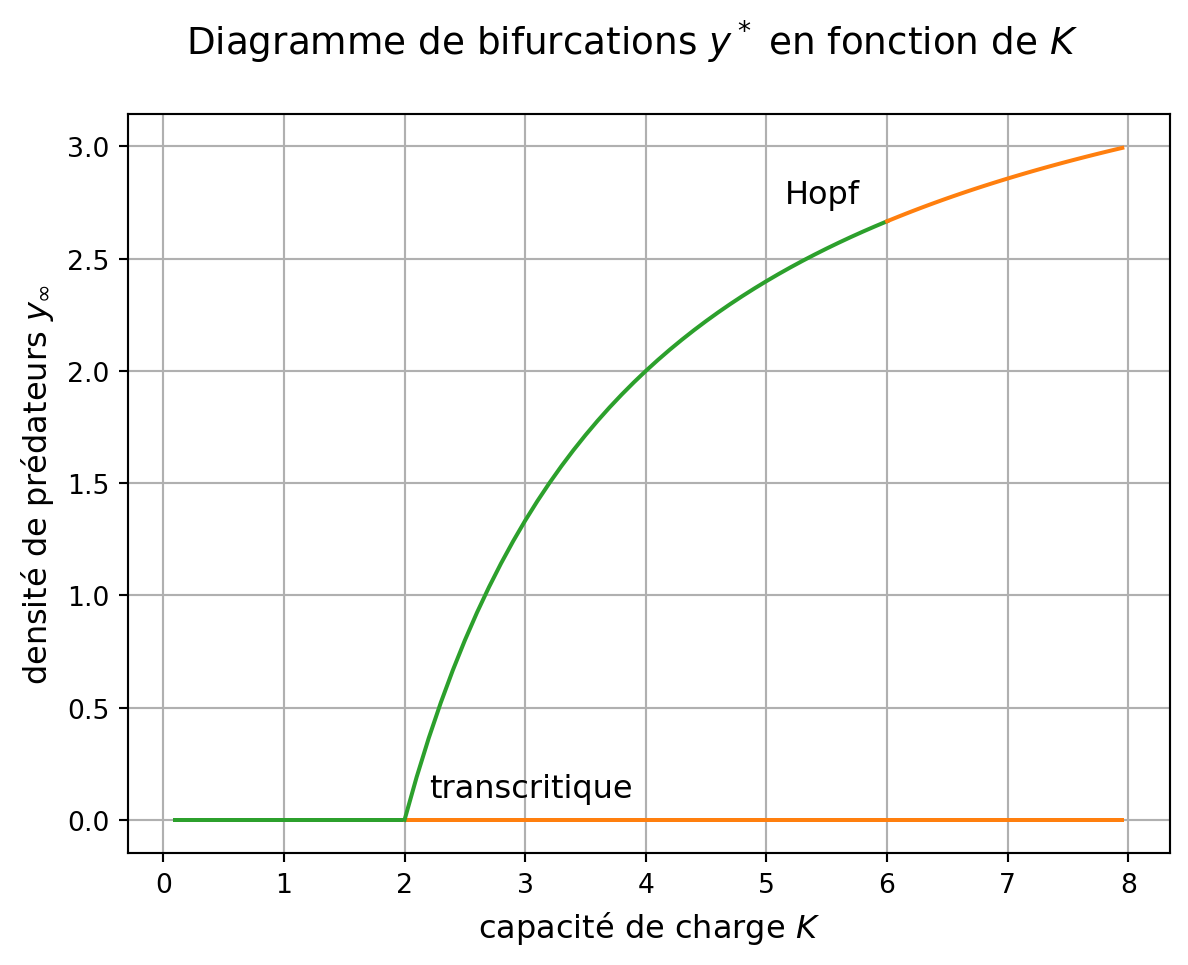

In [17]:
#| code-fold: true
#| label: fig-bif-rma
#| fig-cap: diagramme de bifurcation $y^*$ en fonction de $K$ pour le modèle de Rosenzweig MacArthur (@eq-rma)

fig3, ax3 = plt.subplots(1, 1)  
fig3.suptitle("Diagramme de bifurcations $y^*$ en fonction de $K$",
             va='top', fontsize='14')

## tracé des différentes branches d'équilibres
## situation 1.
ax3.plot(Kplot1, y_prey1, color = 'C2', label = "équilibre stable")

## situation 2.
ax3.plot(Kplot2, y_prey2, color = 'C1', label = "équilibre instable")
ax3.plot(Kplot2, y_coex2, color = 'C2')

## situation 3.
ax3.plot(Kplot3, y_prey3, color = 'C1')
ax3.plot(Kplot3, y_coex3, color = 'C1')

## enluminures
ax3.set_ylabel('densité de prédateurs $y_\infty$', fontsize='12')
ax3.set_xlabel('capacité de charge $K$', fontsize='12')

## Type des bifurcations
ax3.text(2.2, 0.1, 'transcritique', fontsize='12')
ax3.text(5.15, 2.75, 'Hopf', fontsize='12')

ax3.grid()

In [18]:
## temps d'intégration du transitoire "long"
tspan_transitoire = np.arange(t_0, 100*t_fin, pas_t)

## array pour sauvegarder les extrema de la trajectoire périodique
y_cycle_min = np.array([])
y_cycle_max = np.array([])

for K_p in Kplot3:
    ## on assigne le paramètre K à la valeur K_p
    params_RMA_cycle = np.array([r, K_p, c, h, b, m])
    
    ## on simule le système pendant le transitoire
    int_RMA_transitoire =  odeint(model_RMA, 
            etat0_RMA, tspan_transitoire, args=(params_RMA_cycle,), 
            hmax=pas_t)
    
    ## on resimule depuis la dernière valeur calculée 
    ## dans la simulation du transitoire
    int_RMA_cycle = odeint(model_RMA, int_RMA_transitoire[-1, :], 
            tspan, args=(params_RMA_cycle,), hmax=pas_t)
    
    ## on sauvegarde les extremas dans y_cycle_min et 
    ## _max en appendant les array et les réassignant
    y_cycle_min = np.append(y_cycle_min, np.min(int_RMA_cycle[:,1]))
    y_cycle_max = np.append(y_cycle_max, np.max(int_RMA_cycle[:,1]))

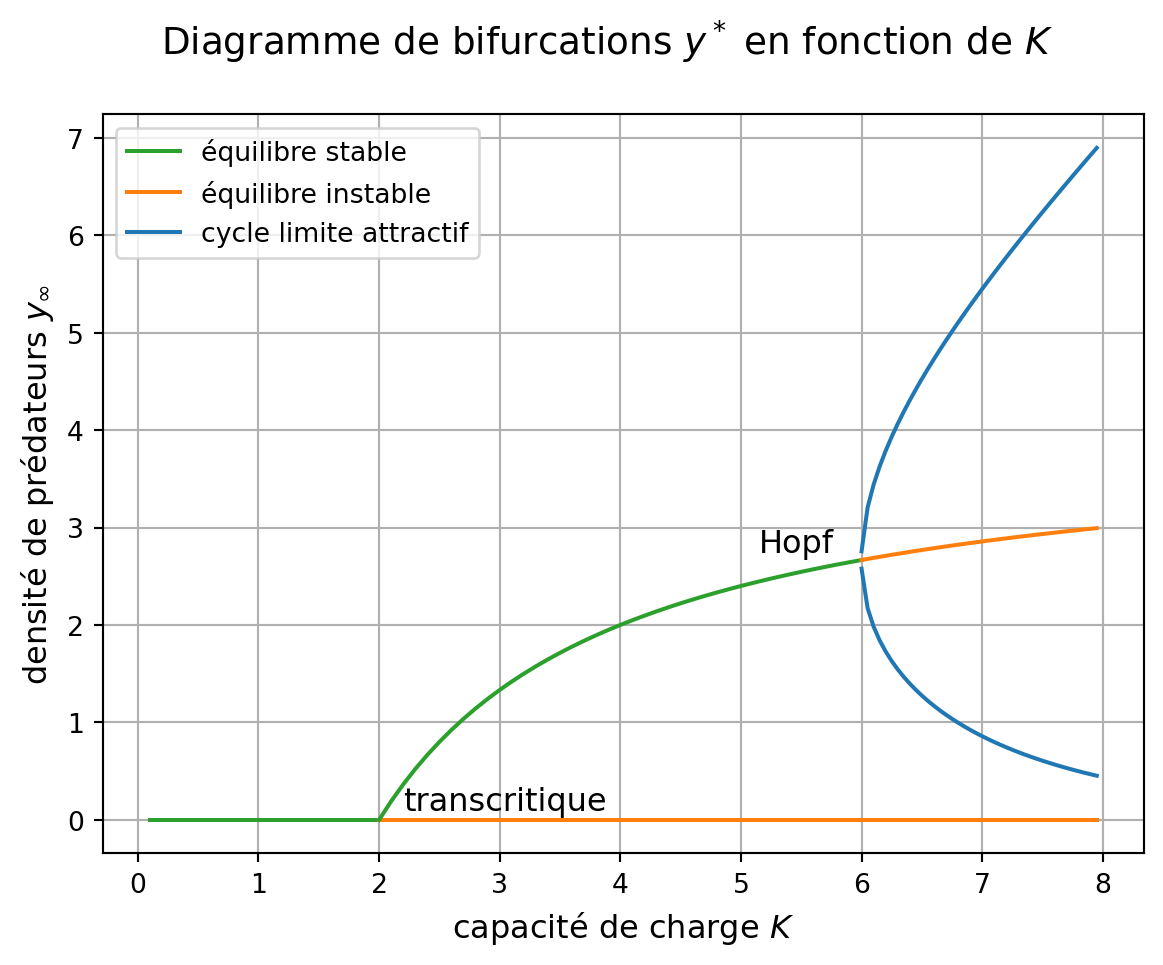

In [19]:
#| label: fig-bif-rma-full
#| fig-cap: diagramme de bifurcation $y^*$ en fonction de $K$ pour le modèle de Rosenzweig MacArthur (@eq-rma)

ax3.plot(Kplot3, y_cycle_min, color = 'C0', label = "cycle limite attractif")
ax3.plot(Kplot3, y_cycle_max, color = 'C0')

## légende
ax3.legend(fontsize='10')

## réafficher la figure
display(fig3)